In [16]:
import pandas as pd
import numpy as np

# Beispiel-Zeitreihe im Sekundentakt
rng = pd.date_range('2025-01-01 00:00:00', periods=120, freq='10S')  # 2 Minuten lang, jede Sekunde
data = [i for i in range(1,len(rng)+1)]  # Zufallswerte
# Erstellen eines DataFrames
df = pd.DataFrame(data, index=rng, columns=['Wert'])
df.head(20)

/tmp/ipykernel_570177/38077776.py:5: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  rng = pd.date_range('2025-01-01 00:00:00', periods=120, freq='10S')  # 2 Minuten lang, jede Sekunde


,Wert
2025-01-01 00:00:00,1
2025-01-01 00:00:10,2
2025-01-01 00:00:20,3
2025-01-01 00:00:30,4
2025-01-01 00:00:40,5
2025-01-01 00:00:50,6
2025-01-01 00:01:00,7
2025-01-01 00:01:10,8
2025-01-01 00:01:20,9
2025-01-01 00:01:30,10


In [17]:
(1 +2 +3+4+5+6)/6

3.5

In [18]:
df_resampled = df.resample('10s').mean()
df_resampled

,Wert
2025-01-01 00:00:00,1.0
2025-01-01 00:00:10,2.0
2025-01-01 00:00:20,3.0
2025-01-01 00:00:30,4.0
2025-01-01 00:00:40,5.0
...,...
2025-01-01 00:19:10,116.0
2025-01-01 00:19:20,117.0
2025-01-01 00:19:30,118.0
2025-01-01 00:19:40,119.0


In [19]:
df_resampled = df.resample('10S').mean()
df_resampled

/tmp/ipykernel_570177/2148952981.py:1: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df.resample('10S').mean()


,Wert
2025-01-01 00:00:00,1.0
2025-01-01 00:00:10,2.0
2025-01-01 00:00:20,3.0
2025-01-01 00:00:30,4.0
2025-01-01 00:00:40,5.0
...,...
2025-01-01 00:19:10,116.0
2025-01-01 00:19:20,117.0
2025-01-01 00:19:30,118.0
2025-01-01 00:19:40,119.0


In [21]:
!pip install scikit-learn

  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 41.5 MB/s eta 0:00:00 0:00:01
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn] [scikit-learn]


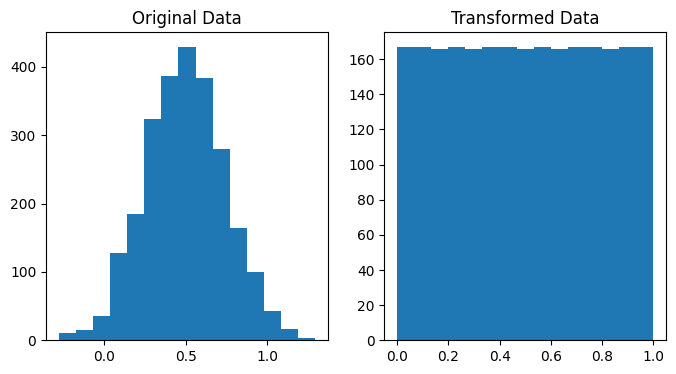

Quantile 0.10 in original data: 0.1817, in transformed data: 0.1000
Quantile 0.25 in original data: 0.3281, in transformed data: 0.2500
Quantile 0.50 in original data: 0.4959, in transformed data: 0.5000
Quantile 0.75 in original data: 0.6560, in transformed data: 0.7500
Quantile 0.90 in original data: 0.8183, in transformed data: 0.9000


In [4]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer
rng = np.random.RandomState(0)
X = np.sort(rng.normal(loc=0.5, scale=0.25, size=(2500, 1)), axis=0)
qt = QuantileTransformer(random_state=0 ,n_quantiles= 2500, subsample=2500)
transformed = qt.fit_transform(X) 
# plot the distribution of the transformed data
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original Data")
plt.hist(X, bins=15)
plt.subplot(1, 2, 2)
plt.title("Transformed Data")
plt.hist(transformed, bins=15)
plt.show()

for quantile in [0.1, 0.25, 0.5, 0.75, 0.9]:
    # get the quantile in X
    quantile_value = np.quantile(X, quantile)
    # transform the quantile value
    transformed_quantile = qt.transform([[quantile_value]])[0, 0]

    print(f"Quantile {quantile:.2f} in original data: {quantile_value:.4f}, "
          f"in transformed data: {transformed_quantile:.4f}")

,Original,Transformed
0,-1.000000,0.000000
1,-0.969697,0.000000
2,-0.939394,0.000000
3,-0.909091,0.000000
4,-0.878788,0.000000
5,-0.848485,0.000000
6,-0.818182,0.000000
7,-0.787879,0.000000
8,-0.757576,0.000000
9,-0.727273,0.000000


Is the transformed output monotonic increasing? True


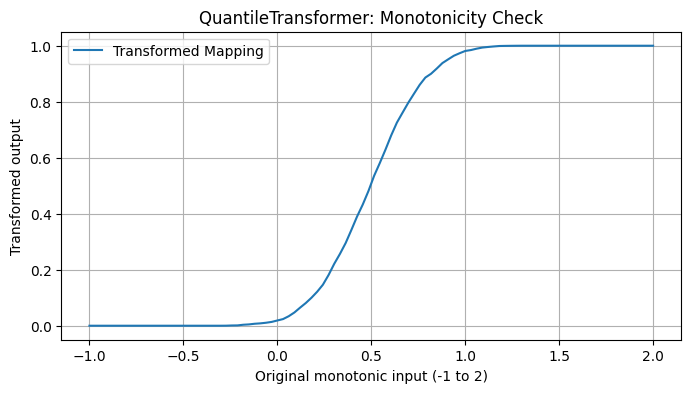

In [12]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer
import matplotlib.pyplot as plt
import pandas as pd

# Create a monotonic increasing array from -1 to 2
X_mono = np.linspace(-1, 2, 100).reshape(-1, 1)


# Fit the QuantileTransformer on a reference dataset
rng = np.random.RandomState(0)
X_ref = np.sort(rng.normal(loc=0.5, scale=0.25, size=(2500, 1)), axis=0)
qt = QuantileTransformer(random_state=0, n_quantiles=2500, subsample=2500)
qt.fit(X_ref)

# Transform the monotonic input
X_mono_transformed = qt.transform(X_mono)

df = pd.DataFrame({
    "Original": X_mono.flatten(),
    "Transformed": X_mono_transformed.flatten()
})
display(df)
#display the full DataFrame
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Check if the result is also monotonic
is_monotonic = np.all(np.diff(X_mono_transformed[:, 0]) >= 0)
print(f"Is the transformed output monotonic increasing? {is_monotonic}")

# Plot
plt.figure(figsize=(8, 4))
plt.plot(X_mono, X_mono_transformed, label='Transformed Mapping')
plt.title("QuantileTransformer: Monotonicity Check")
plt.xlabel("Original monotonic input (-1 to 2)")
plt.ylabel("Transformed output")
plt.grid(True)
plt.legend()
plt.show()


In [8]:
X_ref.min(), X_ref.max()

(np.float64(-0.2792141478997815), np.float64(1.292743693322545))